In [1]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern


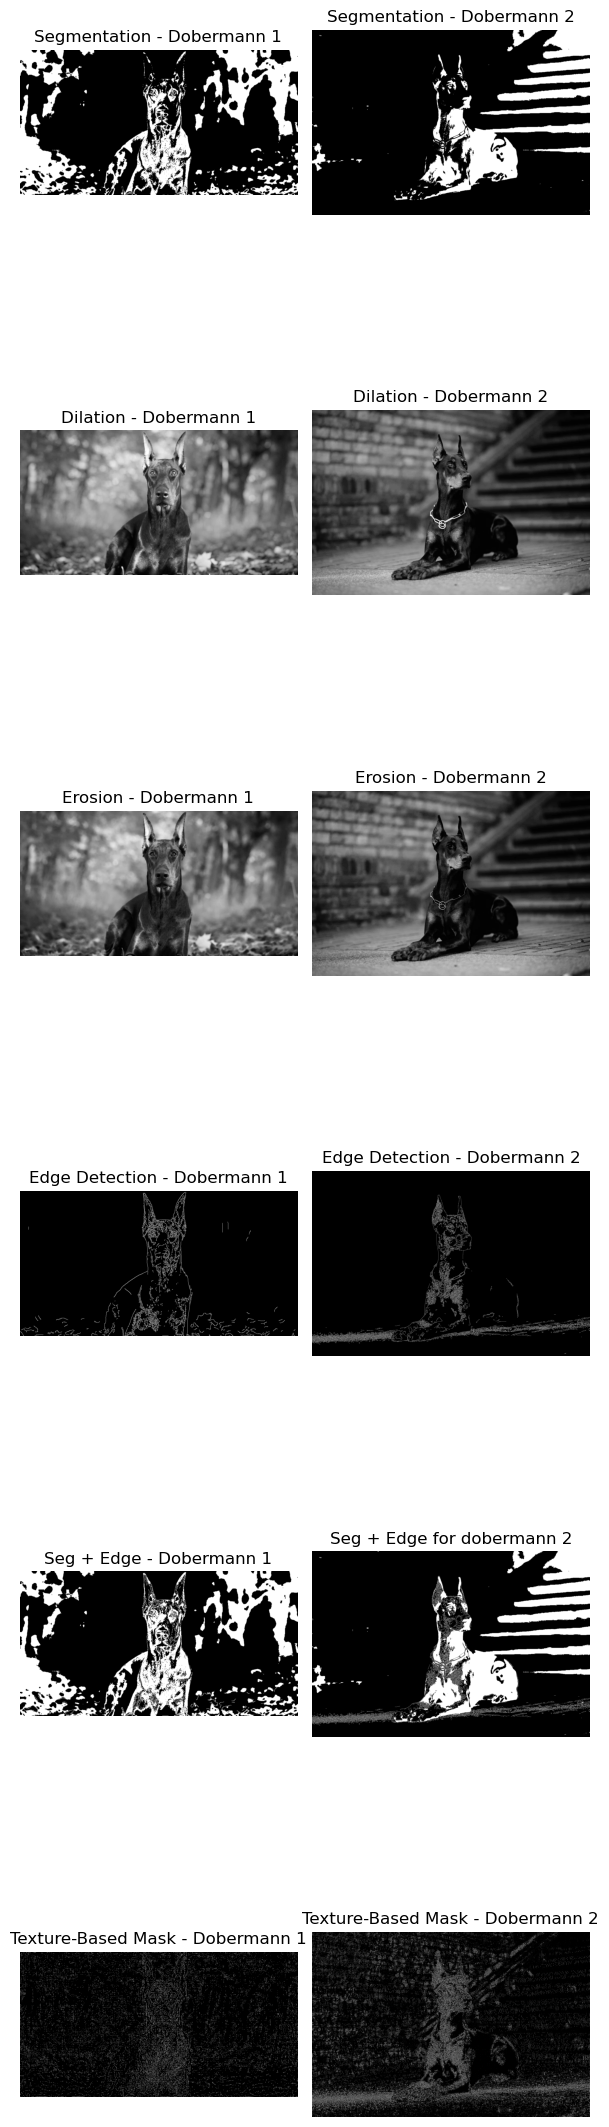

In [2]:
# We're going to read the two images in gray scale
image1 = cv2.imread('/Users/christianattorri/downloads/dob_1.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/Users/christianattorri/downloads/dob_2.png', cv2.IMREAD_GRAYSCALE)

# Intensity Based HSV Segmentation; This is for the dobermann image with the green nature background

lower_green = 35 
upper_green = 85 
mask_image1 = cv2.inRange(image1, lower_green, upper_green) 

# Intensity Based HSV Segmentation; This is for the dobermann image with the brown background

lower_brown = 0 
upper_brown = 20  
mask_image2 = cv2.inRange(image2, lower_brown, upper_brown) 

# Minor dilation filter; Last project the dilation filter was too strong so i made it very mild

tiny_dilation_kernel = np.ones((3, 3), np.uint8)  
dilated_mask1 = cv2.dilate(image1, tiny_dilation_kernel, iterations=1)
dilated_mask2 = cv2.dilate(image2, tiny_dilation_kernel, iterations=1)

# Minor erosion filter; Last project the erosion filter was too strong so i made it very mild

tiny_erosion_kernel = np.ones((3, 3), np.uint8) 
eroded_mask1 = cv2.erode(image1, tiny_erosion_kernel, iterations=1)
eroded_mask2 = cv2.erode(image2, tiny_erosion_kernel, iterations=1)

# Canny Edge Detection

edges1 = cv2.Canny(image1, 100, 150)  
edges2 = cv2.Canny(image2, 50, 100) 

# Compute LBP features for image1 and image2
radius = 1
n_points = 8 * radius
lbp_image1 = local_binary_pattern(image1, n_points, radius, method='uniform')
lbp_image2 = local_binary_pattern(image2, n_points, radius, method='uniform')

# Texture Based Segmentation via Local Binary Patterns (LBP)

texture_mask1 = cv2.inRange(lbp_image1, 0, 1)  
texture_mask2 = cv2.inRange(lbp_image2, 0, 3)  

fig, axs = plt.subplots(6, 2, figsize=(6, 24))

axs[0, 0].imshow(mask_image1, cmap='gray')
axs[0, 0].set_title('Segmentation - Dobermann 1')
axs[0, 0].axis('off')

axs[1, 0].imshow(dilated_mask1, cmap='gray')
axs[1, 0].set_title('Dilation - Dobermann 1')
axs[1, 0].axis('off')

axs[2, 0].imshow(eroded_mask1, cmap='gray')
axs[2, 0].set_title('Erosion - Dobermann 1')
axs[2, 0].axis('off')

axs[3, 0].imshow(edges1, cmap='gray')
axs[3, 0].set_title('Edge Detection - Dobermann 1')
axs[3, 0].axis('off')

axs[4, 0].imshow(mask_image1 + edges1, cmap='gray')  # Segmented Mask + Edge Detection for dobermann 1
axs[4, 0].set_title('Seg + Edge - Dobermann 1')
axs[4, 0].axis('off')

axs[5, 0].imshow(texture_mask1, cmap='gray')  # Texture-Based Mask for dobermann 1
axs[5, 0].set_title('Texture-Based Mask - Dobermann 1')
axs[5, 0].axis('off')

axs[0, 1].imshow(mask_image2, cmap='gray')
axs[0, 1].set_title('Segmentation - Dobermann 2')
axs[0, 1].axis('off')

axs[1, 1].imshow(dilated_mask2, cmap='gray')
axs[1, 1].set_title('Dilation - Dobermann 2')
axs[1, 1].axis('off')

axs[2, 1].imshow(eroded_mask2, cmap='gray')
axs[2, 1].set_title('Erosion - Dobermann 2')
axs[2, 1].axis('off')

axs[3, 1].imshow(edges2, cmap='gray')
axs[3, 1].set_title('Edge Detection - Dobermann 2')
axs[3, 1].axis('off')

axs[4, 1].imshow(mask_image2 + edges2, cmap='gray')  # Segmented Mask + Edge Detection for dobermann 2
axs[4, 1].set_title('Seg + Edge for dobermann 2')
axs[4, 1].axis('off')

axs[5, 1].imshow(texture_mask2, cmap='gray')  # Texture-Based Mask for dobermann 2
axs[5, 1].set_title('Texture-Based Mask - Dobermann 2')
axs[5, 1].axis('off')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

In [3]:

# Save the segmented images as binary masks
cv2.imwrite('/Users/christianattorri/downloads/mask_image1.png', mask_image1)
cv2.imwrite('/Users/christianattorri/downloads/mask_image2.png', mask_image2)


cv2.imwrite('/Users/christianattorri/downloads/edges1.png', edges1)
cv2.imwrite('/Users/christianattorri/downloads/edges2.png', edges2)

cv2.imwrite('/Users/christianattorri/downloads/segmented_plus_edges1.png', mask_image1 + edges1)
cv2.imwrite('/Users/christianattorri/downloads/segmented_plus_edges2.png', mask_image2 + edges2)

cv2.imwrite('/Users/christianattorri/downloads/dilation1.png', dilated_mask1)
cv2.imwrite('/Users/christianattorri/downloads/dilation2.png', dilated_mask2)

cv2.imwrite('/Users/christianattorri/downloads/erosion1.png', eroded_mask1)
cv2.imwrite('/Users/christianattorri/downloads/erosion2.png', eroded_mask2)

cv2.imwrite('/Users/christianattorri/downloads/texture1.png', texture_mask1)
cv2.imwrite('/Users/christianattorri/downloads/texture2.png', texture_mask2)



True